# CASCADES

In [1]:
import sympy
import tellurium as te
import numpy as np
import pandas as pd

# Single element cascade

There is a single species, two inputs (left and right) and two outputs.
\begin{eqnarray}
\dot{S} (t) & = & v^L(t) + v^R(t) - k^L S(t) - k^R S(t) \\
S(s) & = & \frac{v^L(s) + v^R (s)}{ s + k^L  + k^R } \\
\end{eqnarray}

From the final value theorm, we see that $S \rightarrow 0$ if $v^L = 0 = v^R$, which makes intuitive sense.

Note that
\begin{eqnarray}
H^L(s) & = & \frac{S(s)}{v^L(s)} \\
&= & \frac{1}{ s + k^L  + k^R } \\
& = & \frac{S(s)}{v^R(s)} \\
& = & H^R(s) \\
& = & H(s) \\
\end{eqnarray}
That is
$S(s) = H(s) (v^L(s) +  v^R(s))$.

Let $S_n$ be the $n$th species in the cascade with parameters $v^L_{n}, v^R_{n}, k^L_n, k^R_n$.
Consider a two species cascade so that
$n \in {1, 2}$, and
$v^L_1 = 0$ and $v^R_2 = 0$. So we have
\begin{eqnarray}
S_1(s) & = & H_1(s) v_1^R(s) \\
S_2(s) & = & H_2(s) v_2^L(s) \\
v^R_1 (s) & = & S_2 (s) k^L_2 \\
v^R_2 (s) & = & S_1 (s) k^R_2 \\
\end{eqnarray}
and so
\begin{eqnarray}
S_1(s) & = & H_1(s) S_2 (s) k^L_2  \\
S_2(s) & = & H_2(s) S_1 (s) k^R_1  \\
\end{eqnarray}
Substituting,
\begin{eqnarray}
H_1(s) & = & \frac{1}{ H_2(s)  k^R_1  k^L_2 } \\
\end{eqnarray}

\begin{eqnarray}
 H_1(s)& = & \frac{s + k^L_2 }{ k^R_1  k^L_2 } \\
\end{eqnarray}

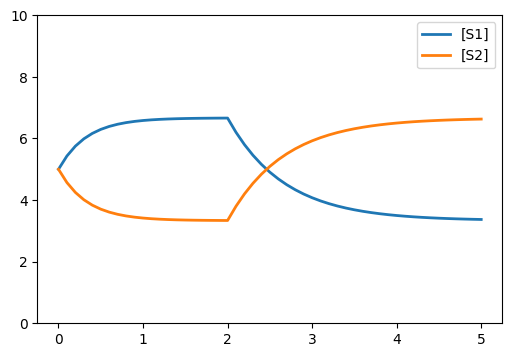

In [7]:
model = """
S1 -> S2; kR1 * S1
S2 -> S1; kL2 * S2

S1 = 5
S2 = 5
kR1 = 1
kL2 = 2

at (time > 2): kL2 = 0.5
"""
rr = te.loada(model)
rr.simulate()
rr.plot(ylim=[0, 10])

# Steady state for n stage cascade

At steady state, the rates across each stage must be the same. That is,
\begin{eqnarray}
k^R_{n-1}S_{n-1} &= &k^L{n}S_{n} \\
\end{eqnarray}
Also, $\sum_n S_n = T$.

So, for an $N$ stage cascade:
\begin{eqnarray}
k^R_{n-1}S_{n-1} &= &k^L{n}S_{n} \\
S_{n} &= & \frac{k^L_{n+1}}{k^R_{n}} S_{n+1} \\
S_{n} &= & \prod_{j=n}^{N-1}\frac{k^L_{j+1}}{k^R_{j}} S_{N} \\
\end{eqnarray}
where $k^L_j =0$ for $j \leq 1$ and $k^R_j = 0$ for $j \geq N$.

And,
\begin{eqnarray}
T & = & \sum_n S_n \\
& = & S_N + \sum_{n=1}^{N-1} \prod_{j=n}^{N-1}\frac{k^L_{j+1}}{k^R_{j}} S_{N} \\
S_N & = &  \frac{T}{1 + \sum_{n=1}^{N-1} \prod_{j=n}^{N-1}\frac{k^L_{j+1}}{k^R_{j}} } \\
S_n & = & \frac{T \prod_{j=n}^{N-1}\frac{k^L_{j+1}}{k^R_{j}} }{1 + \sum_{n=1}^{N-1} \prod_{j=n}^{N-1}\frac{k^L_{j+1}}{k^R_{j}} } \\
\end{eqnarray}